<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/17%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U prophet

In [2]:
import pandas as pd

In [7]:
data = pd.read_csv('sample_data/Measurement_info.csv', parse_dates=[0])

In [ ]:
data

exponential irima 배움
시계열 예측 알고리즘 100프로 공개안됨

In [8]:
def filtering(station, item):
    return data[(data['Station code']==station)&(data['Item code']==item)]

In [9]:
x = filtering(101,8)

In [10]:
data.rename(columns={'Measurement date':'ds', 'Average value':'y'}, inplace=True)

In [11]:
data

,ds,Station code,Item code,y,Instrument status
0,2017-01-01 00:00:00,101,1,0.004,0
1,2017-01-01 00:00:00,101,3,0.059,0
2,2017-01-01 00:00:00,101,5,1.200,0
3,2017-01-01 00:00:00,101,6,0.002,0
4,2017-01-01 00:00:00,101,8,73.000,0
...,...,...,...,...,...
3885061,2019-12-31 23:00:00,123,9,13.000,0
3885062,2019-12-31 23:00:00,118,9,24.000,0
3885063,2019-12-31 23:00:00,105,8,19.000,0
3885064,2019-12-31 23:00:00,125,3,0.037,0


In [12]:
x = filtering(101,8)

In [13]:
from prophet import Prophet

In [14]:
model = Prophet()

In [15]:
model.fit(x)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbvy9wdi/rulpac7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbvy9wdi/17bxr7nt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18036', 'data', 'file=/tmp/tmpbbvy9wdi/rulpac7e.json', 'init=/tmp/tmpbbvy9wdi/17bxr7nt.json', 'output', 'file=/tmp/tmpbbvy9wdi/prophet_modelplo5ol7m/prophet_model-20230729052913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:29:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:29:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
f = model.make_future_dataframe(50,'H')

In [73]:
x

,ds,Station code,Item code,y,Instrument status
4,2017-01-01 00:00:00,101,8,73.0,0
154,2017-01-01 01:00:00,101,8,71.0,0
304,2017-01-01 02:00:00,101,8,70.0,0
454,2017-01-01 03:00:00,101,8,70.0,0
604,2017-01-01 04:00:00,101,8,69.0,0
...,...,...,...,...,...
3884460,2019-12-31 19:00:00,101,8,26.0,0
3884605,2019-12-31 20:00:00,101,8,27.0,0
3884639,2019-12-31 21:00:00,101,8,23.0,0
3884801,2019-12-31 22:00:00,101,8,20.0,0


In [74]:
f

TrendForecaster()

In [18]:
forecast = model.predict(f)

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01 00:00:00,38.295611,14.720599,75.944799,38.295611,38.295611,5.670390,5.670390,5.670390,-1.678536,...,-0.638486,-0.638486,-0.638486,7.987411,7.987411,7.987411,0.0,0.0,0.0,43.966000
1,2017-01-01 01:00:00,38.297786,14.151580,73.758951,38.297786,38.297786,5.303838,5.303838,5.303838,-1.800531,...,-0.907907,-0.907907,-0.907907,8.012277,8.012277,8.012277,0.0,0.0,0.0,43.601624
2,2017-01-01 02:00:00,38.299961,11.705955,73.834841,38.299961,38.299961,4.854321,4.854321,4.854321,-2.011706,...,-1.171234,-1.171234,-1.171234,8.037261,8.037261,8.037261,0.0,0.0,0.0,43.154282
3,2017-01-01 03:00:00,38.302136,12.231201,72.671646,38.302136,38.302136,4.238083,4.238083,4.238083,-2.398178,...,-1.426104,-1.426104,-1.426104,8.062365,8.062365,8.062365,0.0,0.0,0.0,42.540219
4,2017-01-01 04:00:00,38.304311,11.388281,75.561699,38.304311,38.304311,3.633484,3.633484,3.633484,-2.783876,...,-1.670226,-1.670226,-1.670226,8.087586,8.087586,8.087586,0.0,0.0,0.0,41.937795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25950,2020-01-02 21:00:00,36.969591,12.596870,74.360505,36.969591,36.969591,7.005542,7.005542,7.005542,-0.119188,...,-1.573884,-1.573884,-1.573884,8.698614,8.698614,8.698614,0.0,0.0,0.0,43.975132
25951,2020-01-02 22:00:00,36.970328,13.301806,74.740181,36.970328,36.970328,6.339823,6.339823,6.339823,-0.856242,...,-1.530383,-1.530383,-1.530383,8.726448,8.726448,8.726448,0.0,0.0,0.0,43.310152
25952,2020-01-02 23:00:00,36.971066,10.359609,72.998280,36.971066,36.971066,5.870702,5.870702,5.870702,-1.409855,...,-1.473825,-1.473825,-1.473825,8.754382,8.754382,8.754382,0.0,0.0,0.0,42.841768
25953,2020-01-03 00:00:00,36.971804,12.704770,73.901347,36.971804,36.971804,5.699979,5.699979,5.699979,-1.678536,...,-1.403898,-1.403898,-1.403898,8.782413,8.782413,8.782413,0.0,0.0,0.0,42.671783


In [20]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [21]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-01 00:00:00,43.966000,14.720599,75.944799
1,2017-01-01 01:00:00,43.601624,14.151580,73.758951
2,2017-01-01 02:00:00,43.154282,11.705955,73.834841
3,2017-01-01 03:00:00,42.540219,12.231201,72.671646
4,2017-01-01 04:00:00,41.937795,11.388281,75.561699
...,...,...,...,...
25950,2020-01-02 21:00:00,43.975132,12.596870,74.360505
25951,2020-01-02 22:00:00,43.310152,13.301806,74.740181
25952,2020-01-02 23:00:00,42.841768,10.359609,72.998280
25953,2020-01-03 00:00:00,42.671783,12.704770,73.901347


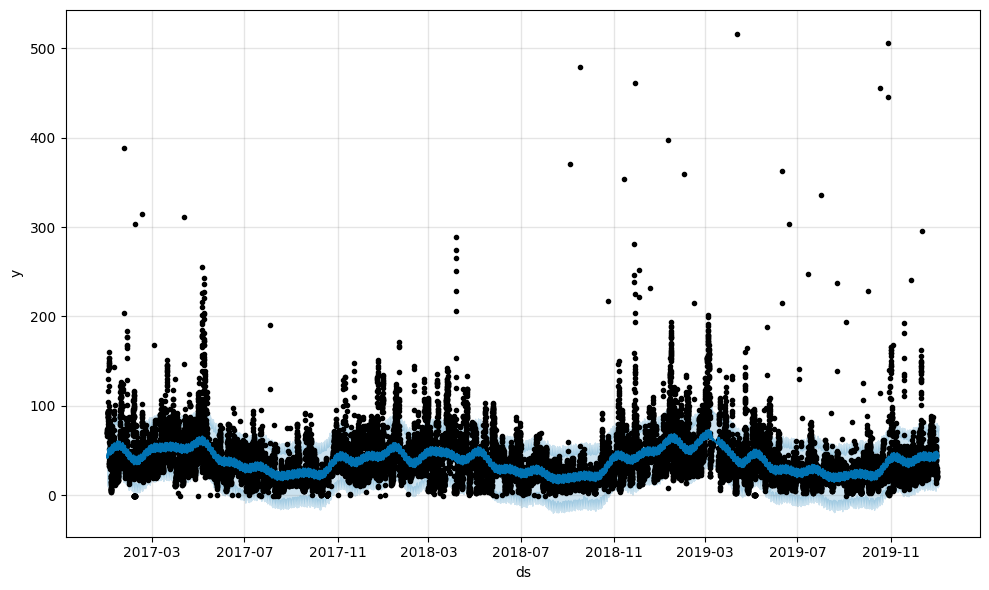

In [22]:
p = model.plot(forecast)

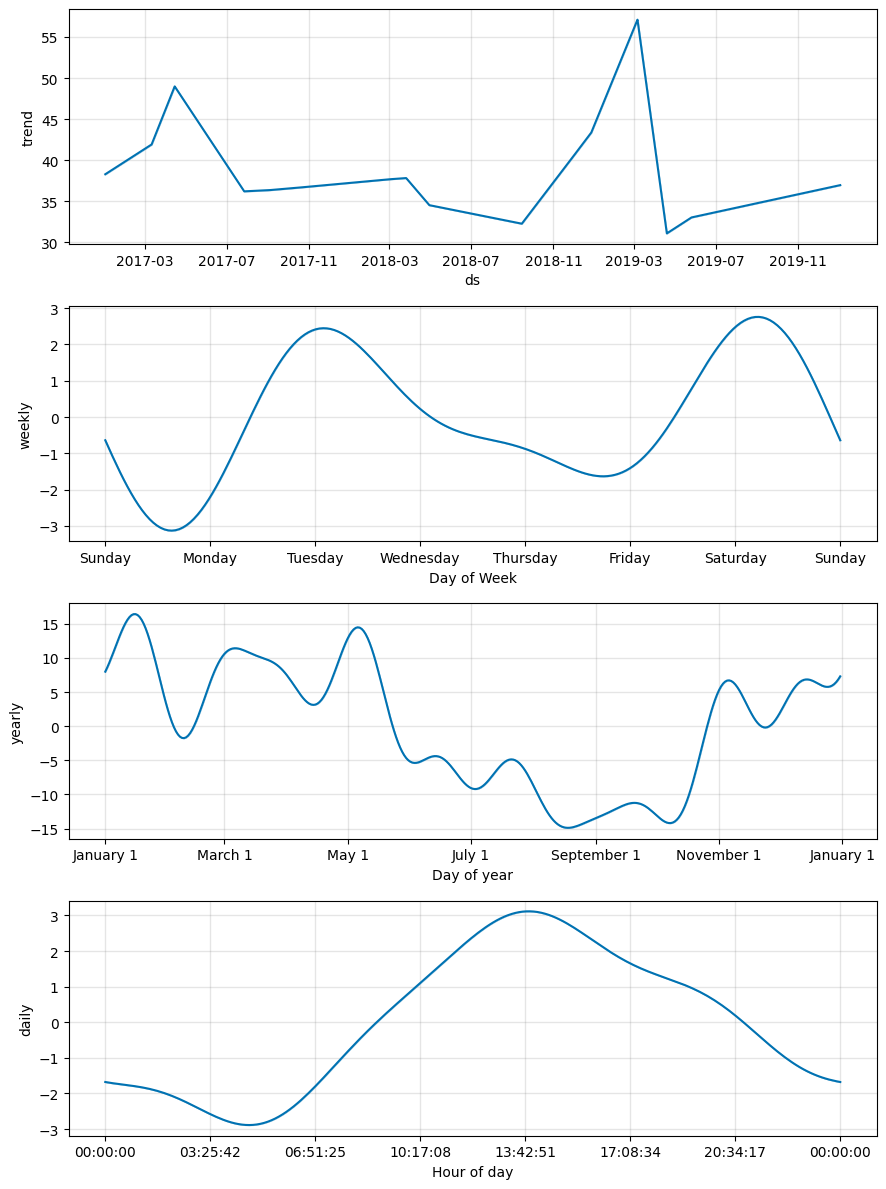

In [24]:
c = model.plot_components(forecast)

In [25]:
from prophet.plot import plot_plotly, plot_components_plotly

In [26]:
plot_components_plotly(model, forecast)

In [27]:
!pip install -U aeon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 5.7 MB/s eta 0:00:00


In [76]:
from sklearn.datasets import load_iris

In [78]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 29.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.9 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11080583 sha256=814254d01fd1c490614e35f97ef46c46dadd943dad7a0d92d7e069a610a4f6ea
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [79]:
#from sklearn.neighbors import K

ImportError: ignored

In [29]:
from aeon.datasets import load_airline

In [30]:
data = load_airline()

In [31]:
type(data)

pandas.core.series.Series

In [32]:
data_pd = pd.DataFrame(data)

In [ ]:
from prophet

In [36]:
d = data_pd.to_timestamp().reset_index().rename(columns={'Period':'ds','Number of airline passengers' :'y'})

In [37]:
m = Prophet()

In [38]:
m.fit(d)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbvy9wdi/pdngxe5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbvy9wdi/ks53f45u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94996', 'data', 'file=/tmp/tmpbbvy9wdi/pdngxe5c.json', 'init=/tmp/tmpbbvy9wdi/ks53f45u.json', 'output', 'file=/tmp/tmpbbvy9wdi/prophet_modelxgmy3wj5/prophet_model-20230729054849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:48:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:48:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
from aeon.forecasting.fbprophet import Prophet

In [40]:
m = Prophet()

In [41]:
m.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbvy9wdi/4e__2tes.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbvy9wdi/idk2zwrx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44973', 'data', 'file=/tmp/tmpbbvy9wdi/4e__2tes.json', 'init=/tmp/tmpbbvy9wdi/idk2zwrx.json', 'output', 'file=/tmp/tmpbbvy9wdi/prophet_modelligj6rmo/prophet_model-20230729055129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet()

## skicit-learn 만 잘하면 갖다 쓸수 있음

In [44]:
from aeon.forecasting.trend import TrendForecaster

In [48]:
f = TrendForecaster()

In [49]:
f.fit(data)

TrendForecaster()

In [54]:
f.predict(5)

1961-05    483.57318
Freq: M, dtype: float64

In [53]:
f.predict([1,2,3,4,5])

1961-01    472.944444
1961-02    475.601628
1961-03    478.258812
1961-04    480.915996
1961-05    483.573180
Freq: M, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
from aeon.forecasting.model_selection import temporal_train_test_split

In [58]:
len(temporal_train_test_split(data))

2

In [59]:
train, test = temporal_train_test_split(data)

In [62]:
len(test)

36

In [60]:
f = TrendForecaster()

In [80]:
f.fit(train)

TrendForecaster()

In [64]:
from aeon.forecasting.base import ForecastingHorizon

In [65]:
fh = ForecastingHorizon(test.index, is_relative=False)

In [66]:
fh

ForecastingHorizon(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', is_relative=False)

In [63]:
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error

In [67]:
mean_absolute_percentage_error(test, f.predict(fh))

0.11725953222644162

In [68]:
f = TrendForecaster()

In [71]:
f.fit(train, fh=fh)

TrendForecaster()

In [72]:
f.score(test)

0.11725953222644162

In [ ]:
from sklearn import set_config

In [ ]:
set_config(display='diagram')

# 특정시간/특정 구/특정 대기질에 대한 상태 예측(색깔)
# classification 문제 아님
# regression 문제임